## Part 1 Duplicate removal and EDA

Import relevant packages for the following parts

In [13]:
import numpy as np
import pandas as pd
import math
import re
import sys

from gensim.models.word2vec import Word2Vec

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
import preprocessing
import csv

### Import data cleaned by using the selfwritten preprocessing module

In [14]:
event_df_loaded = preprocessing.load_data('moria-data')
event_df_loaded = preprocessing.get_processed_data(moria_df_loaded)


  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

loading files...


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.08it/s]


loaded  190188  tweets.
preprocess tweets...
removing unwanted words...
DONE! Processed  10000  tweets ready for analysis!


In [2]:
#load df from scraped json file

df = pd.read_json(r'C:\Users\nikodemicek\CBS - Copenhagen Business School\Kick-Ass Master Thesis - General\Data\scraped_tweets_4-11feb.json',orient='records')
event_df_loaded = pd.json_normalize(df[0])
event_df_loaded.rename(columns = {'text': 'Tweet Raw'},inplace=True)
event_df_loaded = get_processed_data(event_df_loaded)

preprocess tweets...
removing unwanted words...
DONE! Processed  32914  tweets ready for analysis!


In [15]:
#to avoid reloading and preprocessing data
event_df_raw = event_df_loaded.copy()

event_df_raw = preprocessing.remove_duplicate_tweets(event_df_raw)
event_df_raw.reset_index(drop=True,inplace=True)
print(event_df_raw.shape)

#event_df_raw = event_df_raw[:100]

event_df_raw = preprocessing.fuzzy_duplicate_removal(event_df_raw)
event_df_raw.reset_index(drop=True,inplace=True)
print(event_df_raw.shape)


removing retweets and quote tweets...
removing duplicates...
(1590, 32)
Currently on 10th tweet...
Currently on 20th tweet...
Currently on 30th tweet...
Currently on 40th tweet...
Currently on 50th tweet...
Currently on 60th tweet...
Currently on 70th tweet...
Currently on 80th tweet...
Currently on 90th tweet...
Currently on 100th tweet...
The rows that are more than 90.0% similar are: {2: [20], 6: [19], 26: [90], 30: [48, 78, 80], 78: [80], 95: [99]}
Removing 7 fuzzy duplicates
(93, 32)


In [16]:
event_name = 'test_event'
event_df = event_df_raw.copy()

event_df.to_csv(f'{event_name}_no_duplicates.csv')

Currently on 10th tweet...
Currently on 20th tweet...


KeyboardInterrupt: 

<AxesSubplot:>

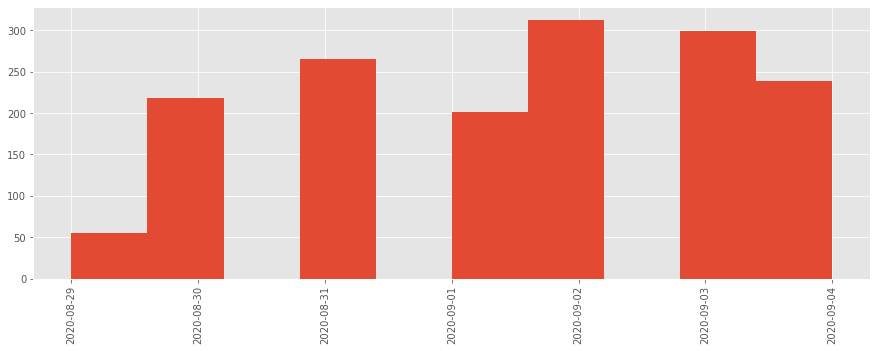

In [12]:

#type(contents)

#set short date as index
moria_df['Date Short'] = pd.to_datetime(moria_df['Date Short'])
#moria_df = moria_df.set_index(moria_df['Date Short'])
#moria_df = moria_df.sort_index()

#moria_df['Date Short'].sort_values()
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)

moria_df['Date Short'].hist()

In [2]:
event_df = pd.read_csv('moria_no_duplicates.csv')
# given event date, split the dataset to pre and post event dfs

event_date = '2020-09-09'

#moria_df[['Date','Time']] = moria_df['Date Short'].astype(str).str.split(' ', 1, expand=True)
# create pre and post event partition
pre_event = event_df[event_df['Date Short'] < event_date]
post_event = event_df[event_df['Date Short'] >= event_date]

print('total tweets: ', event_df.shape[0])
print('Pre event tweets: ',pre_event.shape[0])
print('Post event tweets: ',post_event.shape[0])


total tweets:  18203
Pre event tweets:  3311
Post event tweets:  14892


---

### EDA

what features can we do:
* occurence of words refugee/migrant(immigrant)
* length of tweet (words, characters) (int)
* length of cleaned tweet (words) (int)
* hashtags used (list)
* no. of hashtags (int)


In [349]:
from wordcloud import WordCloud

def get_wordcloud(df):
    #collocations = including bigrams
    cloud = WordCloud(background_color='white',
                      collocations = True, 
                      width=1600, 
                      height=800).generate(' '.join(df['Tweet Clean']))
    plt.figure(figsize=(20,10))
    plt.imshow(cloud)
    plt.axis('off')
    return plt.show()





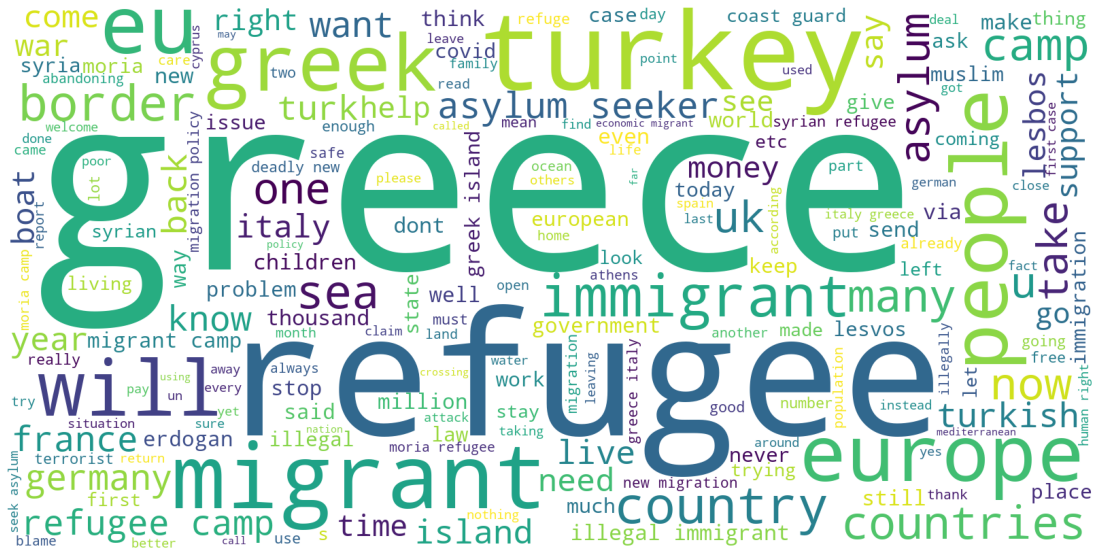

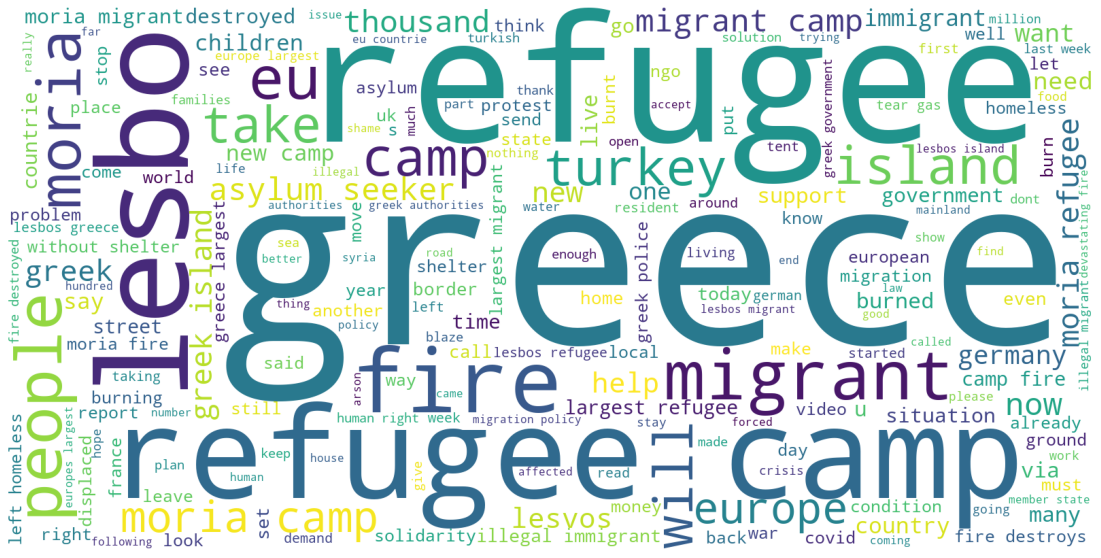

In [350]:
get_wordcloud(pre_event)

get_wordcloud(post_event)

In [27]:
import seaborn as sns

def bar_chart(dfSeries):
    plt.figure(figsize=(12,6))
    ax = dfSeries.value_counts().plot(kind = 'bar')
    for p in ax.patches:
        ax.annotate(str(round(p.get_height()/dfSeries.shape[0]*100,2))+'%', (p.get_x()+0.2, p.get_height() * 0.5))


In [28]:
#we should make our own sentiment analysis

bar_chart(pre_event.Sentiment)

AttributeError: 'DataFrame' object has no attribute 'Sentiment'

In [ ]:
bar_chart(post_event.Sentiment)

In [ ]:
moria_df["Country"].value_counts()

In [ ]:
moria_df['Reach'].describe()


In [ ]:
print('Mean reach:',round(moria_df["Reach"].mean(),2))
print('Median reach:',moria_df["Reach"].median())
print('Max reach:', max(moria_df["Reach"]))

In [ ]:
def plot_hist(measure = 'Reach'):
    print("Number of Unique {}: {}".format(measure, str(len(moria_df[measure].unique()))))
    print("{} Median: {}".format(measure, str(moria_df[measure].median())))
    print(moria_df[measure].describe())
    plt.figure(figsize=(14,4))
    plt.hist(moria_df[measure], bins = 100)
    plt.show()

    
plot_hist()